In [1]:
#!pip install ruamel.yaml
#!pip install --upgrade jinja2
#!pip install sweetviz

In [2]:
import pandas as pd
import numpy as np
#import pandas_profiling

In [3]:
df = pd.read_csv('_data.csv')

C:\Users\surze\AppData\Local\Temp\ipykernel_1044\1187116152.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('_data.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155909 entries, 0 to 155908
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Host name          155909 non-null  object 
 1   User age bracket   155909 non-null  object 
 2   Branding interest  155909 non-null  object 
 3   User gender        155909 non-null  object 
 4   City               155909 non-null  object 
 5   Event name         155909 non-null  object 
 6   Device category    155909 non-null  object 
 7   Date               155909 non-null  object 
 8   Active users       44999 non-null   float64
 9   Engaged sessions   155909 non-null  int64  
 10  Sessions           155909 non-null  int64  
 11  New users          155909 non-null  int64  
 12  Event count        155909 non-null  int64  
 13  Unnamed: 13        0 non-null       float64
 14  Unnamed: 14        0 non-null       float64
 15  Unnamed: 15        29 non-null      object 
dtypes:

In [5]:
df = df.drop(['Unnamed: 13', 'Unnamed: 14','Unnamed: 15'], axis=1)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155909 entries, 0 to 155908
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Host name          155909 non-null  object        
 1   User age bracket   155909 non-null  object        
 2   Branding interest  155909 non-null  object        
 3   User gender        155909 non-null  object        
 4   City               155909 non-null  object        
 5   Event name         155909 non-null  object        
 6   Device category    155909 non-null  object        
 7   Date               155909 non-null  datetime64[ns]
 8   Active users       44999 non-null   float64       
 9   Engaged sessions   155909 non-null  int64         
 10  Sessions           155909 non-null  int64         
 11  New users          155909 non-null  int64         
 12  Event count        155909 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), 

In [8]:
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('output.html')

In [9]:
#!pip install dtale

In [10]:
# import dtale

# # 
# # df = pd.read_csv('your_data.csv')

# d = dtale.show(df)
# d.open_browser()

In [11]:
#d.open_browser()

In [12]:
df['YearMonth'] = df['Date'].dt.to_period('M')  # Cria uma nova coluna com o ano e o mês

# Agrupa por 'Host name' e 'YearMonth' e conta os meses únicos para cada 'Host name'
months_count = df.groupby('Host name')['YearMonth'].nunique()

#print(months_count)

In [13]:
df['YearMonth'] = df['Date'].dt.to_period('M')  # Cria uma nova coluna com o ano e o mês

# Cria a tabela cruzada
cross_tab = pd.crosstab(df['Host name'], df['YearMonth'])

#print(cross_tab)

In [14]:
#cross_tab

In [15]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [16]:
df['Month_sin'] = np.sin((df['Date'].dt.month-1)*(2.*np.pi/12))
df['Month_cos'] = np.cos((df['Date'].dt.month-1)*(2.*np.pi/12))
df['Day_sin'] = np.sin((df['Date'].dt.day-1)*(2.*np.pi/30.))
df['Day_cos'] = np.cos((df['Date'].dt.day-1)*(2.*np.pi/30.))

In [17]:
reference_date = pd.Timestamp('2000-01-01')
df['TimeDifference'] = (df['Date'] - reference_date).dt.days

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155909 entries, 0 to 155908
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Host name          155909 non-null  object        
 1   User age bracket   155909 non-null  object        
 2   Branding interest  155909 non-null  object        
 3   User gender        155909 non-null  object        
 4   City               155909 non-null  object        
 5   Event name         155909 non-null  object        
 6   Device category    155909 non-null  object        
 7   Date               155909 non-null  datetime64[ns]
 8   Active users       44999 non-null   float64       
 9   Engaged sessions   155909 non-null  int64         
 10  Sessions           155909 non-null  int64         
 11  New users          155909 non-null  int64         
 12  Event count        155909 non-null  int64         
 13  YearMonth          155909 non-null  period[M

In [19]:
df.columns

Index(['Host name', 'User age bracket', 'Branding interest', 'User gender',
       'City', 'Event name', 'Device category', 'Date', 'Active users',
       'Engaged sessions', 'Sessions', 'New users', 'Event count', 'YearMonth',
       'Year', 'Month', 'Day', 'DayOfWeek', 'Month_sin', 'Month_cos',
       'Day_sin', 'Day_cos', 'TimeDifference'],
      dtype='object')

In [20]:
# df_encoded = df[['Host name', 'Branding interest', 'User gender',
#        'City', 'Event name', 'Device category', 'Active users',
#        'Engaged sessions', 'Sessions', 'New users', 'Event count', 'Month_sin', 'Month_cos',
#        'Day_sin', 'Day_cos']]

# df_encoded.info()

In [21]:
# Get the names of columns of type 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Create a temporary 'combined' column that combines the object columns without filling in the missing values
df['combined_temp'] = df[object_columns].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

# Determine the maximum length of the underscore-separated values in the temporary 'combined' column
max_len = df['combined_temp'].str.split('_').apply(len).max()

# Define a function that joins a row into a string with exactly max_len underscore-separated values
def join_row(row):
    # Convert the row to a list
    values = list(row.values.astype(str))
    # If there are fewer than max_len values, append placeholders ('NA') to the list
    while len(values) < max_len:
        values.append('NA')
    # If there are more than max_len values, remove the extra values
    values = values[:max_len]
    # Join the values into a string with underscore separators
    return '_'.join(values)

# Create the 'combined' column with the missing values filled in
df['combined'] = df[object_columns].apply(join_row, axis=1)

# Drop the temporary 'combined' column
df.drop(columns=['combined_temp'], inplace=True)

# Create a pivot table with the new column as the index
pivot_table = df.pivot_table(index='combined')

pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12220 entries, bangushopping.com_18-24_Beauty & Wellness/Beauty Mavens_female_Rio de Janeiro_page_view_mobile_NA_NA to www.montesclarosshopping.com.br_18-24_Technology/Technophiles_male_Montes Claros_session_start_mobile_NA_NA
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Active users      3605 non-null   float64
 1   Day               12220 non-null  float64
 2   DayOfWeek         12220 non-null  float64
 3   Day_cos           12220 non-null  float64
 4   Day_sin           12220 non-null  float64
 5   Engaged sessions  12220 non-null  float64
 6   Event count       12220 non-null  float64
 7   Month             12220 non-null  float64
 8   Month_cos         12220 non-null  float64
 9   Month_sin         12220 non-null  float64
 10  New users         12220 non-null  float64
 11  Sessions          12220 non-null  float64
 12  TimeDifference    12220 non-null

In [22]:
object_columns

Index(['Host name', 'User age bracket', 'Branding interest', 'User gender',
       'City', 'Event name', 'Device category'],
      dtype='object')

In [23]:
#pivot_table.index

In [24]:
pivot_table['Year'] = pivot_table['Year'].astype(int)

In [25]:
#pivot_table.head()

In [26]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12220 entries, bangushopping.com_18-24_Beauty & Wellness/Beauty Mavens_female_Rio de Janeiro_page_view_mobile_NA_NA to www.montesclarosshopping.com.br_18-24_Technology/Technophiles_male_Montes Claros_session_start_mobile_NA_NA
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Active users      3605 non-null   float64
 1   Day               12220 non-null  float64
 2   DayOfWeek         12220 non-null  float64
 3   Day_cos           12220 non-null  float64
 4   Day_sin           12220 non-null  float64
 5   Engaged sessions  12220 non-null  float64
 6   Event count       12220 non-null  float64
 7   Month             12220 non-null  float64
 8   Month_cos         12220 non-null  float64
 9   Month_sin         12220 non-null  float64
 10  New users         12220 non-null  float64
 11  Sessions          12220 non-null  float64
 12  TimeDifference    12220 non-null

In [27]:
from sklearn.impute import KNNImputer

# 
imputer = KNNImputer(n_neighbors=4)

# Fit on the dataset and transform it
df_imputed = imputer.fit_transform(pivot_table)

# Convert the result back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=pivot_table.columns, index=pivot_table.index)

In [28]:
#df_imputed

In [29]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12220 entries, bangushopping.com_18-24_Beauty & Wellness/Beauty Mavens_female_Rio de Janeiro_page_view_mobile_NA_NA to www.montesclarosshopping.com.br_18-24_Technology/Technophiles_male_Montes Claros_session_start_mobile_NA_NA
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Active users      12220 non-null  float64
 1   Day               12220 non-null  float64
 2   DayOfWeek         12220 non-null  float64
 3   Day_cos           12220 non-null  float64
 4   Day_sin           12220 non-null  float64
 5   Engaged sessions  12220 non-null  float64
 6   Event count       12220 non-null  float64
 7   Month             12220 non-null  float64
 8   Month_cos         12220 non-null  float64
 9   Month_sin         12220 non-null  float64
 10  New users         12220 non-null  float64
 11  Sessions          12220 non-null  float64
 12  TimeDifference    12220 non-null

In [32]:
from sklearn.impute import SimpleImputer
#import numpy as np
#import pandas as pd

# Convert the numpy array back to a DataFrame
df_imputed = pd.DataFrame(df_imputed)

# Replace 0s with NaNs
df_imputed.replace(0, np.nan, inplace=True)

# Store column and index information
columns = df_imputed.columns
index = df_imputed.index

# Create an instance of SimpleImputer with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit on the dataset and transform it
df_imputed = imputer.fit_transform(df_imputed)

# Convert the result back to a DataFrame using the stored column and index information
df_imputed = pd.DataFrame(df_imputed, columns=columns, index=index)

In [33]:
print(pivot_table.info())


<class 'pandas.core.frame.DataFrame'>
Index: 12220 entries, bangushopping.com_18-24_Beauty & Wellness/Beauty Mavens_female_Rio de Janeiro_page_view_mobile_NA_NA to www.montesclarosshopping.com.br_18-24_Technology/Technophiles_male_Montes Claros_session_start_mobile_NA_NA
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Active users      3605 non-null   float64
 1   Day               12220 non-null  float64
 2   DayOfWeek         12220 non-null  float64
 3   Day_cos           12220 non-null  float64
 4   Day_sin           12220 non-null  float64
 5   Engaged sessions  12220 non-null  float64
 6   Event count       12220 non-null  float64
 7   Month             12220 non-null  float64
 8   Month_cos         12220 non-null  float64
 9   Month_sin         12220 non-null  float64
 10  New users         12220 non-null  float64
 11  Sessions          12220 non-null  float64
 12  TimeDifference    12220 non-null

In [34]:
print (df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12220 entries, bangushopping.com_18-24_Beauty & Wellness/Beauty Mavens_female_Rio de Janeiro_page_view_mobile_NA_NA to www.montesclarosshopping.com.br_18-24_Technology/Technophiles_male_Montes Claros_session_start_mobile_NA_NA
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Active users      12220 non-null  float64
 1   Day               12220 non-null  float64
 2   DayOfWeek         12220 non-null  float64
 3   Day_cos           12220 non-null  float64
 4   Day_sin           12220 non-null  float64
 5   Engaged sessions  12220 non-null  float64
 6   Event count       12220 non-null  float64
 7   Month             12220 non-null  float64
 8   Month_cos         12220 non-null  float64
 9   Month_sin         12220 non-null  float64
 10  New users         12220 non-null  float64
 11  Sessions          12220 non-null  float64
 12  TimeDifference    12220 non-null

In [35]:
null_count = df_imputed['Active users'].isnull().sum()
null_count

0

In [36]:
df_imputed['Active users'].value_counts()

10.000000    863
11.000000    610
10.500000    424
10.250000    352
12.000000    278
            ... 
19.082075      1
19.299149      1
12.833333      1
11.656921      1
11.069891      1
Name: Active users, Length: 4175, dtype: int64

In [37]:
print(df_imputed['Active users'].max())
print(df_imputed['Active users'].min())

48.5
6.5


In [38]:
# df.columns = [f"{col}_df" for col in df.columns]

In [39]:
# missing_columns = set(df.columns) - set(df_encoded.columns)

# for column in missing_columns:
#     df_encoded[column] = df[column]

In [40]:
df_imputed['Active users'].value_counts(dropna=False)

10.000000    863
11.000000    610
10.500000    424
10.250000    352
12.000000    278
            ... 
19.082075      1
19.299149      1
12.833333      1
11.656921      1
11.069891      1
Name: Active users, Length: 4175, dtype: int64

In [41]:
df_imputed['Active users'].isna().sum()

0

In [42]:
df_imputed.columns

Index(['Active users', 'Day', 'DayOfWeek', 'Day_cos', 'Day_sin',
       'Engaged sessions', 'Event count', 'Month', 'Month_cos', 'Month_sin',
       'New users', 'Sessions', 'TimeDifference', 'Year'],
      dtype='object')

In [43]:
df_imputed['Active users'].isna().sum()

0

In [44]:
df_imputed.columns

Index(['Active users', 'Day', 'DayOfWeek', 'Day_cos', 'Day_sin',
       'Engaged sessions', 'Event count', 'Month', 'Month_cos', 'Month_sin',
       'New users', 'Sessions', 'TimeDifference', 'Year'],
      dtype='object')

In [45]:
#df_imputed.index

In [46]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12220 entries, bangushopping.com_18-24_Beauty & Wellness/Beauty Mavens_female_Rio de Janeiro_page_view_mobile_NA_NA to www.montesclarosshopping.com.br_18-24_Technology/Technophiles_male_Montes Claros_session_start_mobile_NA_NA
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Active users      12220 non-null  float64
 1   Day               12220 non-null  float64
 2   DayOfWeek         12220 non-null  float64
 3   Day_cos           12220 non-null  float64
 4   Day_sin           12220 non-null  float64
 5   Engaged sessions  12220 non-null  float64
 6   Event count       12220 non-null  float64
 7   Month             12220 non-null  float64
 8   Month_cos         12220 non-null  float64
 9   Month_sin         12220 non-null  float64
 10  New users         12220 non-null  float64
 11  Sessions          12220 non-null  float64
 12  TimeDifference    12220 non-null

In [47]:
# Reset the index
df_imputed.reset_index(inplace=True)

# Print the columns of the DataFrame
print(df_imputed.columns)

df_imputed.info()

Index(['combined', 'Active users', 'Day', 'DayOfWeek', 'Day_cos', 'Day_sin',
       'Engaged sessions', 'Event count', 'Month', 'Month_cos', 'Month_sin',
       'New users', 'Sessions', 'TimeDifference', 'Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12220 entries, 0 to 12219
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   combined          12220 non-null  object 
 1   Active users      12220 non-null  float64
 2   Day               12220 non-null  float64
 3   DayOfWeek         12220 non-null  float64
 4   Day_cos           12220 non-null  float64
 5   Day_sin           12220 non-null  float64
 6   Engaged sessions  12220 non-null  float64
 7   Event count       12220 non-null  float64
 8   Month             12220 non-null  float64
 9   Month_cos         12220 non-null  float64
 10  Month_sin         12220 non-null  float64
 11  New users         12220 non-null  float6

In [48]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12220 entries, 0 to 12219
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   combined          12220 non-null  object 
 1   Active users      12220 non-null  float64
 2   Day               12220 non-null  float64
 3   DayOfWeek         12220 non-null  float64
 4   Day_cos           12220 non-null  float64
 5   Day_sin           12220 non-null  float64
 6   Engaged sessions  12220 non-null  float64
 7   Event count       12220 non-null  float64
 8   Month             12220 non-null  float64
 9   Month_cos         12220 non-null  float64
 10  Month_sin         12220 non-null  float64
 11  New users         12220 non-null  float64
 12  Sessions          12220 non-null  float64
 13  TimeDifference    12220 non-null  float64
 14  Year              12220 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.4+ MB


In [49]:
# Split the 'combined' column into multiple columns
df_split = df_imputed['combined'].str.split('_', n=len(object_columns)-1, expand=True)

# Rename the new columns to match the original object columns
df_split.columns = object_columns

# Drop the 'combined' column from the original DataFrame
df_imputed.drop(columns=['combined'], inplace=True)

# Concatenate the original DataFrame with the new DataFrame
df = pd.concat([df_imputed, df_split], axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12220 entries, 0 to 12219
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Active users       12220 non-null  float64
 1   Day                12220 non-null  float64
 2   DayOfWeek          12220 non-null  float64
 3   Day_cos            12220 non-null  float64
 4   Day_sin            12220 non-null  float64
 5   Engaged sessions   12220 non-null  float64
 6   Event count        12220 non-null  float64
 7   Month              12220 non-null  float64
 8   Month_cos          12220 non-null  float64
 9   Month_sin          12220 non-null  float64
 10  New users          12220 non-null  float64
 11  Sessions           12220 non-null  float64
 12  TimeDifference     12220 non-null  float64
 13  Year               12220 non-null  float64
 14  Host name          12220 non-null  object 
 15  User age bracket   12220 non-null  object 
 16  Branding interest  122

In [51]:

df['Month'] = df['Month'].astype(float).astype(int)

In [52]:
df['Month'] = df['Month'].astype(int)

In [53]:
# Convert 'year' and 'Month' to string
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str)

# Combine 'year' and 'Month' columns
df['year_month'] = df['Year'] + '_' + df['Month']

In [54]:
df['year_month'].value_counts() 

2023.0_7     4217
2023.0_8     2067
2023.0_12    1758
2023.0_10    1305
2023.0_9     1296
2023.0_6      572
2023.0_11     399
2024.0_1      269
2023.0_5      138
2023.0_4      127
2023.0_3       49
2023.0_2       21
2023.0_1        2
Name: year_month, dtype: int64

In [55]:
df['year_month'] = df['year_month'].str.replace('.0_', '-')

C:\Users\surze\AppData\Local\Temp\ipykernel_1044\3450826656.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['year_month'] = df['year_month'].str.replace('.0_', '-')


In [56]:
df['year_month'].value_counts() 

2023-7     4217
2023-8     2067
2023-12    1758
2023-10    1305
2023-9     1296
2023-6      572
2023-11     399
2024-1      269
2023-5      138
2023-4      127
2023-3       49
2023-2       21
2023-1        2
Name: year_month, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12220 entries, 0 to 12219
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Active users       12220 non-null  float64
 1   Day                12220 non-null  float64
 2   DayOfWeek          12220 non-null  float64
 3   Day_cos            12220 non-null  float64
 4   Day_sin            12220 non-null  float64
 5   Engaged sessions   12220 non-null  float64
 6   Event count        12220 non-null  float64
 7   Month              12220 non-null  object 
 8   Month_cos          12220 non-null  float64
 9   Month_sin          12220 non-null  float64
 10  New users          12220 non-null  float64
 11  Sessions           12220 non-null  float64
 12  TimeDifference     12220 non-null  float64
 13  Year               12220 non-null  object 
 14  Host name          12220 non-null  object 
 15  User age bracket   12220 non-null  object 
 16  Branding interest  122

In [58]:
# Cria a tabela cruzada
cross_tab_encod = pd.crosstab(df['Host name'], df['year_month'])
#cross_tab_encod

In [59]:
pivot_table = df.pivot_table(index='Host name', columns='year_month', values='Active users', aggfunc='count')
#pivot_table

In [62]:
import os

# Get the path to your home directory
home_dir = os.path.expanduser("~")

# Create a path for the output file in your home directory
output_file = os.path.join(home_dir, 'df.xlsx')

#df.to_excel(output_file, index=False)

In [63]:
home_dir

'C:\\Users\\surze'

In [64]:
df.columns

Index(['Active users', 'Day', 'DayOfWeek', 'Day_cos', 'Day_sin',
       'Engaged sessions', 'Event count', 'Month', 'Month_cos', 'Month_sin',
       'New users', 'Sessions', 'TimeDifference', 'Year', 'Host name',
       'User age bracket', 'Branding interest', 'User gender', 'City',
       'Event name', 'Device category', 'year_month'],
      dtype='object')

In [65]:
#df

In [66]:
# Agrupa por 'Host name' e 'YearMonth' e conta os meses únicos para cada 'Host name'
months_count = df.groupby('Host name')['year_month'].nunique()

#print(months_count)

In [67]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Create a new column 'original_index' if it doesn't exist
if 'original_index' not in df.columns:
    df['original_index'] = df.index

# No need to set 'Host name' as index again

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.fillna(df_numeric.mean())

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_numeric)

# Apply KMeans to the PCA result
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_pca)

# Calculate Silhouette Score
score = silhouette_score(df_pca, kmeans.labels_)
print("Silhouette Score: ", score)

Silhouette Score:  0.5886842875059936


In [68]:
df['Cluster_pca'] = kmeans.labels_

In [69]:
#Redução de dimensionalidade:
#Agglomerative Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

pca = PCA(n_components=2)  # Adjust number of components
df_pca = pca.fit_transform(df_numeric)


# Apply MiniBatchKMeans
mbkmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=2048).fit(df_pca)

In [70]:
# Calculate Silhouette Score
score = silhouette_score(df_pca, mbkmeans.labels_)
print("Silhouette Score: ", score)

Silhouette Score:  0.5876934783091554


In [71]:
# Add a new column to the dataframe with the cluster labels
df['Cluster_MiniBatchKMeans'] = mbkmeans.labels_

In [72]:
print(df['Cluster_MiniBatchKMeans'].value_counts())
print(df['Cluster_pca'].value_counts())


0    4349
2    4060
1    3811
Name: Cluster_MiniBatchKMeans, dtype: int64
1    4120
0    4073
2    4027
Name: Cluster_pca, dtype: int64


In [73]:
# Set the maximum number of columns to display to None, which means display all columns
pd.set_option('display.max_columns', None)

# Print the column names
print(df.columns)

Index(['Active users', 'Day', 'DayOfWeek', 'Day_cos', 'Day_sin',
       'Engaged sessions', 'Event count', 'Month', 'Month_cos', 'Month_sin',
       'New users', 'Sessions', 'TimeDifference', 'Year', 'Host name',
       'User age bracket', 'Branding interest', 'User gender', 'City',
       'Event name', 'Device category', 'year_month', 'original_index',
       'Cluster_pca', 'Cluster_MiniBatchKMeans'],
      dtype='object')


In [74]:
df[['Cluster_MiniBatchKMeans','Cluster_pca']].value_counts()

Cluster_MiniBatchKMeans  Cluster_pca
0                        1              4120
2                        0              3844
1                        2              3811
0                        0               229
2                        2               216
dtype: int64

In [75]:

# Calculate Silhouette Score
silhouette_mbkmeans = silhouette_score(df_pca, mbkmeans.labels_)
print(f'Silhouette Score for MiniBatchKMeans: {silhouette_mbkmeans}')

Silhouette Score for MiniBatchKMeans: 0.5876934783091554


In [76]:
# Apply KMeans to the PCA result
print("Silhouette Score: ", score)

Silhouette Score:  0.5876934783091554


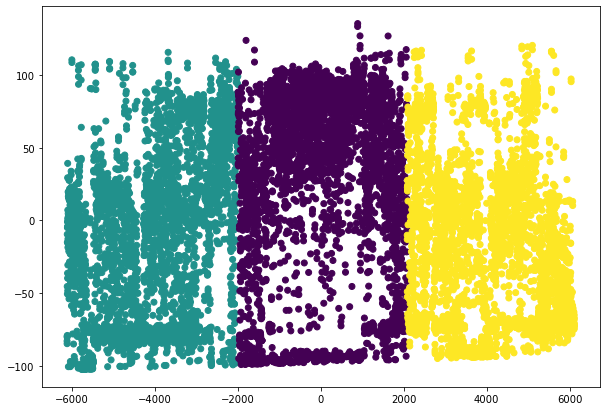

In [77]:
import matplotlib.pyplot as plt

# Assume that kmeans is your trained model and df_pca is your 2D data after PCA
labels = kmeans.labels_

# Create a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')

# Show the plot
plt.show()

In [78]:
import plotly.graph_objects as go

# Assume that kmeans is your trained model and df_pca is your 2D data after PCA
labels = kmeans.labels_

# Create a scatter plot
fig = go.Figure(data=go.Scatter(
    x=df_pca[:, 0],
    y=df_pca[:, 1],
    mode='markers',
    marker=dict(
        size=8,
        color=labels, 
        colorscale='Viridis', 
        opacity=0.8
    ),
    text=df.index,  # this line sets the hover text to the index values (Host name)
    hoverinfo='text'
))

fig.show()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12220 entries, 0 to 12219
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Active users             12220 non-null  float64
 1   Day                      12220 non-null  float64
 2   DayOfWeek                12220 non-null  float64
 3   Day_cos                  12220 non-null  float64
 4   Day_sin                  12220 non-null  float64
 5   Engaged sessions         12220 non-null  float64
 6   Event count              12220 non-null  float64
 7   Month                    12220 non-null  object 
 8   Month_cos                12220 non-null  float64
 9   Month_sin                12220 non-null  float64
 10  New users                12220 non-null  float64
 11  Sessions                 12220 non-null  float64
 12  TimeDifference           12220 non-null  float64
 13  Year                     12220 non-null  object 
 14  Host name             

In [82]:
# Get the path to your home directory
home_dir = os.path.expanduser("~")

# Create a path for the output file in your home directory
output_file = os.path.join(home_dir, 'df_clustered.xlsx')

df.to_excel(output_file, index=False)

In [81]:
#home_dir